In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
RAW_PATH = "../data/raw/E Commerce Dataset.xlsx"
SHEET = "E Comm"

df_raw = pd.read_excel(RAW_PATH, sheet_name=SHEET)
df_raw.columns = df_raw.columns.str.strip()

print("Shape:", df_raw.shape)
df_raw.head()


Shape: (5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
TARGET = "Churn"
print("Columns:", df_raw.columns.tolist())
print("\nTarget present?", TARGET in df_raw.columns)
df_raw[TARGET].value_counts(dropna=False)


Columns: ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Target present? True


Churn
0    4682
1     948
Name: count, dtype: int64

In [9]:
missing_counts = df_raw.isna().sum().sort_values(ascending=False)
missing_pct = (df_raw.isna().mean() * 100).sort_values(ascending=False)

pd.DataFrame({
    "missing_count": missing_counts,
    "missing %": missing_pct
}).head(15)


,missing_count,missing %
DaySinceLastOrder,307,5.452931
OrderAmountHikeFromlastYear,265,4.706927
Tenure,264,4.689165
OrderCount,258,4.582593
CouponUsed,256,4.547069
HourSpendOnApp,255,4.529307
WarehouseToHome,251,4.458259
CustomerID,0,0.000000
MaritalStatus,0,0.000000
Complain,0,0.000000


In [10]:
df_raw.describe(include="all").T.head(30)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,NaN,NaN,NaN,52815.5,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,NaN,NaN,NaN,0.168384,0.37424,0.0,0.0,0.0,0.0,1.0
Tenure,5366.0,NaN,NaN,NaN,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
PreferredLoginDevice,5630,3,Mobile Phone,2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,5630.0,NaN,NaN,NaN,1.654707,0.915389,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,5379.0,NaN,NaN,NaN,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
PreferredPaymentMode,5630,7,Debit Card,2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5630,2,Male,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourSpendOnApp,5375.0,NaN,NaN,NaN,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,NaN,NaN,NaN,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0


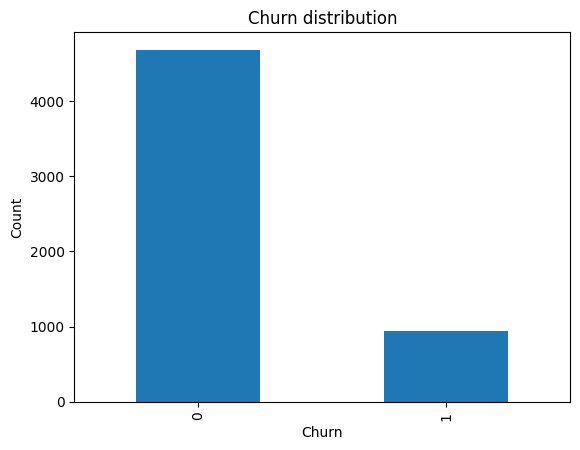

In [11]:
counts = df_raw[TARGET].value_counts(dropna=False)
plt.figure()
counts.plot(kind="bar")
plt.title("Churn distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


In [12]:
PROC_PATH = "../data/processed/churn_processed.csv"
df_proc = pd.read_csv(PROC_PATH)
print("Processed shape:", df_proc.shape)
df_proc.head()


Processed shape: (5630, 31)


,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Churn
0,50001,4.0,3,6.0,3.0,3,2,9,1,11.0,...,False,False,False,True,False,False,False,False,True,1
1,50002,9.0,1,8.0,3.0,4,3,7,1,15.0,...,True,True,False,False,True,False,False,False,True,1
2,50003,9.0,1,30.0,2.0,4,3,6,1,14.0,...,False,True,False,False,True,False,False,False,True,1
3,50004,0.0,3,15.0,2.0,4,5,8,0,23.0,...,False,True,False,True,False,False,False,False,True,1
4,50005,0.0,1,12.0,3.0,3,5,3,0,11.0,...,False,True,False,False,True,False,False,False,True,1


In [13]:
print("Target in processed?", TARGET in df_proc.columns)
df_proc[TARGET].value_counts(normalize=True)


Target in processed? True


Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64